![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---
### Estudiantes:
- Martín Sepúlveda
- Maximiliano Varas
### Repositorio: [Enlace](https://github.com/mvarasg/labs-sepulveda-varas)

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Además, se adjunta junto con los datos del proyecto un archivo llamado `requirements.txt` que contiene todas las bibliotecas y versiones necesarias para el desarrollo del proyecto. Se le recomienda levantar un ambiente de `conda` para instalar estas librerías y así evitar cualquier problema con las versiones.


```conda create --name proyecto2-environment python=3.10 -y```

`conda activate proyecto2-environment`

`pip install -r requirements.txt`

---



### 1. Introducción [0.5 puntos]

El problema a continuacion, se basa en lo solicitado por el cliente del rubro bancario, el cual busca poder clasificar clientes a traves de su historial referente a credito y similares, esto con el objetivo de evaluar si los clientes seran sujetos dispuestos poseen cuotas impagas o finalmente, ser clientes catalogados como "fraudulentos" que podrian llevar a  problemas para la empresa en cuestion. Con esto en mente, los datos proporcionados par agneerar esta clasificacion de clientes consisita en datos referentes a carcteristicas porpias de clientes, tal como edad, profesion y sueldo, ademas de datos referentes a su comportamiento bancario, esto se refiere a caracteisticas como el numero de tarjetas de credito, el comportamiento de pago en los creidtos, el numeor de cuetnas bancarias que posee y su historial de credito. \\

Con esto en mente, el objetivo principal puesto al ojbetivo del proyecto es, generar un clasificador que pririce en sus metricas obtener los mejores resultaods referentes a la clasificacion en los casos fraudulentos, ya que para la empresa es mas riesgoso admitir cliente suq epueden comprometer los futuros ingresos por el incumplimento de pagos o con comportamientos fraudulentos. Es por eto que se utlizara la variable Credit score porporcionada como indicador de cliente normal '0' o cliente fraudulento  '1', y se evaluaran los resultados de los modelos a traves de f1-score de la clase fraudulenta, el cual representa el promedio harminco entre precision y recall, pues queremos mantener una bjaa cnatidad de falsos negativos, clientes fraudulentos mal clasificados, para disminuir el riesgo par ala empresa, y asi mismo es necesario mantener consideraciones de presicion del modelo para que este no se vea sesgado a una clase, e spor esto que f1-score es la metrica a utilzar.\\


Respecto a clasificador utilizado, fue posible obtener un clasificador de tipo Random forest que considera optimizar el f1-score del modelo, donde l pipeline utilizado consiste en un column transformer que transforma las variables numericas a traves de un escalador MinMax, y las variables categoricas a traves de un OneHotEncoder, posterior a esto se utliza un SelectPercentile para conservar las caractersticas mas relevantes del dataframe, posterior a esto se utlizó un algoritomo de rando forest para obtener el modelo clasificador. en terminos gnerales, el modelo no entrega resultados aceptables, porque un gran nuemor de casos aun son clasificados como falsos postivos, esto lleva a que aun exist aun riesgo latente importante para la empresa. Sin embargo, a traves de la interpretabilidad del modelo, fue posible obtner caracteristicas relevantes que son als cuale sposeen un mayor impacto en el modelo en general y que pueden ser importante apara la seleccion de clientes por parte d ela empresa en el futuro y quqe pueden sentar base a ser cosnideradas jutno a nuevas features para una nueva ejecucion del proyecto.


### 2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]

_La idea de esta sección es que cargen y exploren el dataset para así obtener una idea de como son los datos y como se relacionan con el problema._

Cargue los datos y realice un análisis exploratorio de datos para investigar patrones, tendencias y relaciones en un conjunto de datos. Se adjuntan diversos scripts para abodar rápidamente este punto. La descripción de las columnas las pueden encontrar en el siguiente [enlace](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).

**NO deben escribir nada**, solo ejecutar el código y encontrar los patrones con los cuales se basaran para generar el modelo.


In [1]:
# Librerías iniciales
import pandas as pd
import numpy as np

In [2]:
#Lectura de dataset
df = pd.read_parquet('dataset.pq')
df

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0x372c,19.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,9,...,1.0,1079.48,35.716618,28.0,No,34.975457,115.184984,High_spent_Medium_value_payments,NaN,0
12496,CUS_0xf16,45.0,Media_Manager,16680.35,NaN,1,1,5,4.0,1,...,8.0,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,0
12497,CUS_0xaf61,50.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,...,3.0,620.64,39.300980,30.0,No,84.205949,42.935566,High_spent_Medium_value_payments,NaN,0
12498,CUS_0x8600,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,...,9.0,3571.70,37.140784,6.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,NaN,0


In [3]:
df =df.dropna()

In [4]:
df

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
6,CUS_0x284a,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,0,...,4.0,352.16,29.187913,31.0,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12282,CUS_0x7dc5,32.0,Architect,175572.44,14422.036667,5,4,1,3.0,10,...,1.0,388.99,43.306156,32.0,No,290.106973,97.860362,High_spent_Large_value_payments,1294.236331,0
12283,CUS_0xa568,40.0,Scientist,120009.32,10242.776667,5,1,7,4.0,14,...,0.0,446.51,36.839608,29.0,No,230.528352,197.626771,High_spent_Large_value_payments,836.122544,0
12284,CUS_0x701f,24.0,Lawyer,59868.93,5111.077500,4,7,9,4.0,8,...,4.0,417.72,24.803887,29.0,No,104.622038,10000.000000,Low_spent_Small_value_payments,80.190256,0
12286,CUS_0xa407,29.0,Entrepreneur,34599.94,2942.328333,7,6,3,0.0,22,...,1.0,942.59,33.128609,27.0,No,0.000000,165.397552,High_spent_Small_value_payments,388.835282,0



### 3. Preparación de Datos [0.5 puntos]

_Esta sección consiste en generar los distintos pasos para preparar sus datos con el fin de luego poder crear su modelo._

#### 3.1 Preprocesamiento con `ColumnTransformer`



Se seleccionan las columnas correspondientes a características numericas y categoricas

In [5]:
numeric_features = ['age', 'num_bank_accounts', 'num_credit_card','interest_rate', 'num_of_loan','delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt',
            'credit_utilization_ratio',  'credit_history_age', 'annual_income', 'monthly_inhand_salary', 'amount_invested_monthly','total_emi_per_month', 'monthly_balance']

categorical_features = ['occupation', 'payment_of_min_amount', 'payment_behaviour']


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline



numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first')

column_transformer = ColumnTransformer(
    transformers=[
        #('ln', log_transformer, salary_features),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [7]:
transformed_data = column_transformer.fit_transform(df)
df_tranformed = pd.DataFrame(transformed_data, columns = column_transformer.get_feature_names_out())

In [8]:
df_tranformed

,num__age,num__num_bank_accounts,num__num_credit_card,num__interest_rate,num__num_of_loan,num__delay_from_due_date,num__num_of_delayed_payment,num__changed_credit_limit,num__num_credit_inquiries,num__outstanding_debt,...,cat__occupation_Writer,cat__occupation________,cat__payment_of_min_amount_No,cat__payment_of_min_amount_Yes,cat__payment_behaviour_High_spent_Large_value_payments,cat__payment_behaviour_High_spent_Medium_value_payments,cat__payment_behaviour_High_spent_Small_value_payments,cat__payment_behaviour_Low_spent_Large_value_payments,cat__payment_behaviour_Low_spent_Medium_value_payments,cat__payment_behaviour_Low_spent_Small_value_payments
0,0.057529,0.001707,0.002668,0.000864,0.063924,0.111111,0.001659,0.267981,0.000783,0.120993,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.058183,0.001138,0.003336,0.001209,0.065190,0.180556,0.002133,0.306961,0.001175,0.260652,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.060471,0.001707,0.003336,0.000518,0.000000,0.125000,0.002844,0.188399,0.001567,0.126481,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.056766,0.004553,0.003336,0.000691,0.000000,0.083333,0.004266,0.202088,0.001567,0.188790,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.058183,0.000569,0.000667,0.001209,0.064557,0.069444,0.001185,0.358933,0.001567,0.070396,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,0.057965,0.003415,0.002668,0.000000,0.065190,0.208333,0.001185,0.283527,0.000392,0.077765,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7982,0.058836,0.003415,0.000667,0.001037,0.065823,0.263889,0.000948,0.298840,0.000000,0.089275,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7983,0.057093,0.002846,0.004670,0.001382,0.065823,0.180556,0.003318,0.283527,0.001567,0.083514,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7984,0.057638,0.004553,0.004003,0.000346,0.063291,0.375000,0.002607,0.222274,0.000392,0.188536,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0




#### 3.2 Holdout 

Se ejecuta un  `train_test_split` para generar un conjunto de entrenamiento y de prueba. 



In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df, df['credit_score'], test_size=0.3, random_state=0)



#### 3.3 Datos nulos.

Ya previamente ejecutado, se opta por eliminar las filas que contienen elementos nulos en las características numéricas, ya que se daban en estos casos, así mismo se ejecutara el baseline posterior y la búsqueda del mejor clasificador con este dataset y posteriormente se ejecutarán pruebas con un componente imputado en el pipeline para comparar el funcionamiento de ambos casos.

### 4. Baseline [1.5 puntos]

_En esta sección deben crear los modelos más básicos posibles que resuelvan el problema dado. La idea de estos modelos son usarlos como comparación para que en el siguiente paso lo puedan mejorar._

Implemente, entrene y evalúe varias `Pipeline` enfocadas en resolver el problema de clasificación en donde la diferencia entre estas sea el modelo utilizado.


Para esto, cada Pipeline debe:

- Tener el `ColumnTransformer` implementado en la sección anterior como primer paso.
- Implementar un imputador en caso de haber decidido conservar los datos nulos.
- Implementar un clasificador en la salida (ver siguiente lista).
  
Y además, 
- Ser evaluado de forma general imprimiendo un `classification_report`.
- Calcular y guardar la métrica seleccionada en el punto 1.2 en un arreglo de métricas (guardar nombre y valor de la métrica).

Lo anterior debe ser implementado utilizando los siguientes modelos:

- `Dummy` con estrategia estratificada.
- `LogisticRegression`.
- `KNeighborsClassifier`.
- `DecisionTreeClassifier`
- `SVC`
- `RandomForestClassifier` 
- `LightGBMClassifier` (del paquete `lightgbm`)
- `XGBClassifier` (del paquete `xgboost`).


Luego, transformando el diccionario de las métricas a un pandas `DataFrame`, ordene según los valores de su métrica de mayor a menor y responda.
- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?
- ¿Cuál es el mejor clasificador entrenado?
- ¿Por qué el mejor clasificador es mejor que los otros?
- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

**Nota**: Puede utilizar un for más una lista con las clases de los modelos mencionados para simplificar el proceso anterior.

In [10]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

def pipeline_classifer(pipeline, X_train, X_test, y_train, y_test, name):
    
    transformed_data = pipeline.fit(X_train, y_train)

    predictions = transformed_data.predict(X_test)
            
    cm = confusion_matrix(y_test, predictions, normalize='true')
    classes = unique_labels(y_test, predictions)

    print("\033[1m=============\033[0m"*7)
    print('                  '+f'\033[1mResultados Clasificador: {name}\033[0m')
    print("\033[1m=============\033[0m"*7)
    df = pd.DataFrame(cm, index=classes, columns=classes)

    g = sns.heatmap(df, annot=True, cmap="Blues")
    g.set_yticklabels(g.get_yticklabels(), rotation=0)

    plt.title(f'Confusion matrix: {name}\n')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.autoscale()
    plt.show()

    print(classification_report(y_test, predictions))

    return

In [11]:
# Definir los clasificadores
dummy_classifier = DummyClassifier(strategy='stratified',random_state=0)
logistic_regression = LogisticRegression(random_state=0)
k_neighbors_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
svc_classifier = SVC(random_state=0)
random_forest_classifier = RandomForestClassifier(random_state=0)
lightgbm_classifier = lgb.LGBMClassifier(random_state=0)
xgboost_classifier = xgb.XGBClassifier(random_state=0)

                  Resultados Clasificador: dummy_classifier


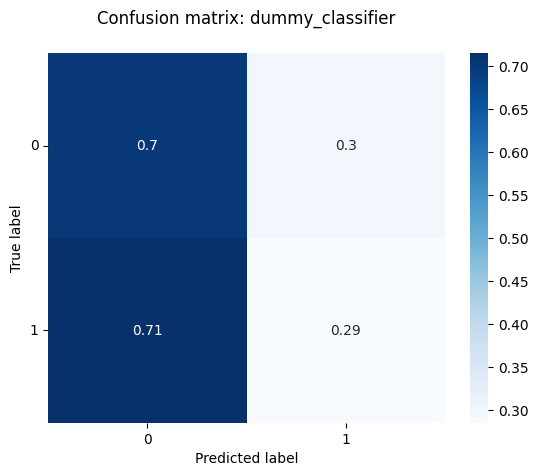

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1695
           1       0.28      0.29      0.28       701

    accuracy                           0.58      2396
   macro avg       0.49      0.49      0.49      2396
weighted avg       0.58      0.58      0.58      2396

                  Resultados Clasificador: logistic_regression


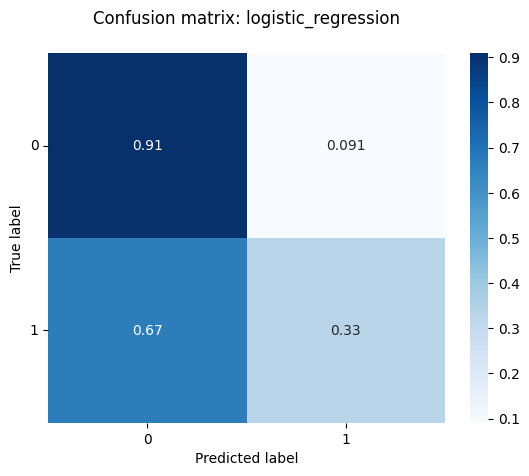

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1695
           1       0.60      0.33      0.43       701

    accuracy                           0.74      2396
   macro avg       0.68      0.62      0.63      2396
weighted avg       0.72      0.74      0.71      2396

                  Resultados Clasificador: k_neighbors_classifier


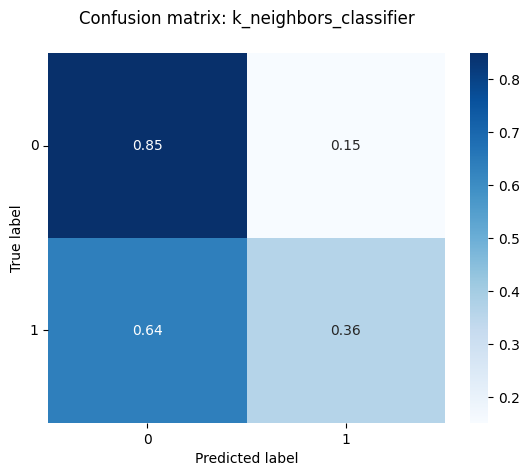

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1695
           1       0.50      0.36      0.42       701

    accuracy                           0.71      2396
   macro avg       0.63      0.61      0.61      2396
weighted avg       0.69      0.71      0.69      2396

                  Resultados Clasificador: decision_tree_classifier


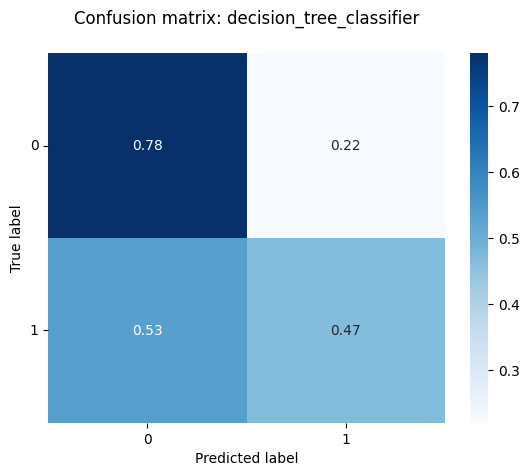

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1695
           1       0.47      0.47      0.47       701

    accuracy                           0.69      2396
   macro avg       0.62      0.62      0.62      2396
weighted avg       0.69      0.69      0.69      2396

                  Resultados Clasificador: svc_classifier


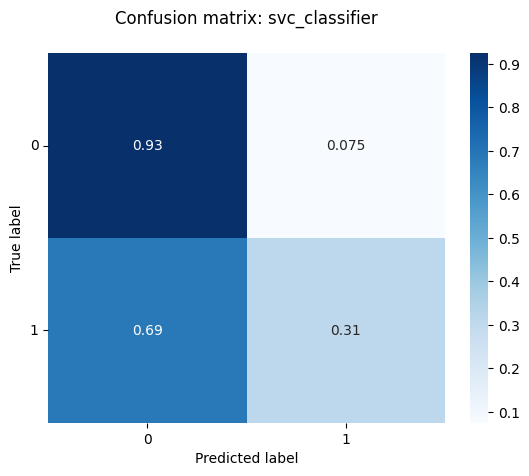

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1695
           1       0.63      0.31      0.42       701

    accuracy                           0.75      2396
   macro avg       0.70      0.62      0.63      2396
weighted avg       0.73      0.75      0.71      2396

                  Resultados Clasificador: random_forest_classifier


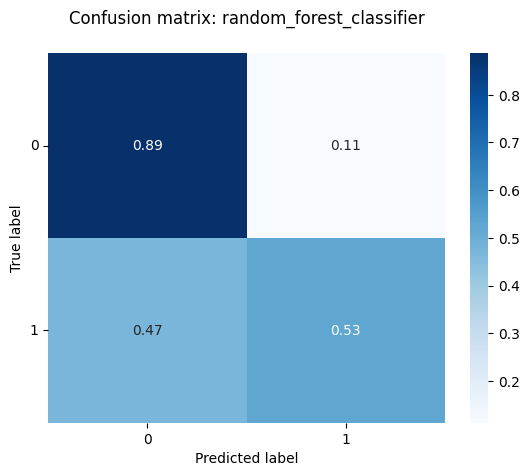

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1695
           1       0.66      0.53      0.59       701

    accuracy                           0.78      2396
   macro avg       0.74      0.71      0.72      2396
weighted avg       0.77      0.78      0.77      2396

[LightGBM] [Info] Number of positive: 1607, number of negative: 3983
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1992
[LightGBM] [Info] Number of data points in the train set: 5590, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287478 -> initscore=-0.907666
[LightGBM] [Info] Start training from score -0.907666
                  Resultados Clasificador: lightgbm_classifier


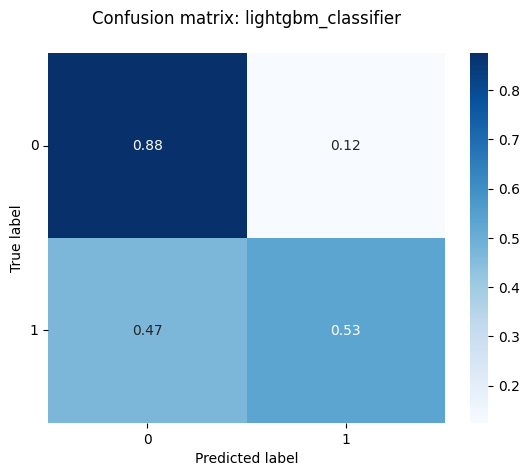

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1695
           1       0.64      0.53      0.58       701

    accuracy                           0.77      2396
   macro avg       0.73      0.70      0.71      2396
weighted avg       0.77      0.77      0.77      2396

                  Resultados Clasificador: xgboost_classifier


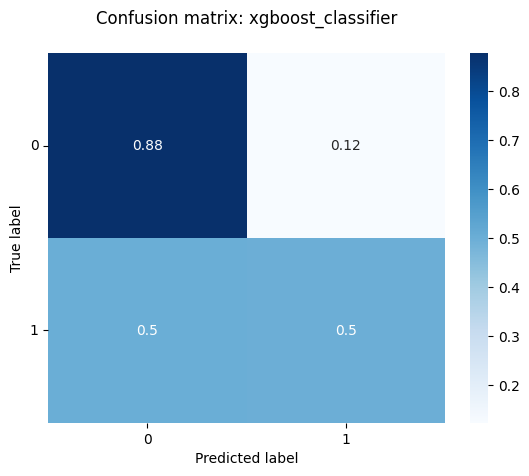

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1695
           1       0.63      0.50      0.56       701

    accuracy                           0.77      2396
   macro avg       0.72      0.69      0.70      2396
weighted avg       0.76      0.77      0.76      2396



In [12]:


# Crear la lista de clasificadores
clf_list = [
    (dummy_classifier, 'dummy_classifier'),
    (logistic_regression, 'logistic_regression'),
    (k_neighbors_classifier, 'k_neighbors_classifier'),
    (decision_tree_classifier, 'decision_tree_classifier'),
    (svc_classifier, 'svc_classifier'),
    (random_forest_classifier, 'random_forest_classifier'),
    (lightgbm_classifier, 'lightgbm_classifier'),
    (xgboost_classifier, 'xgboost_classifier')
]

for clf,name in clf_list:
    baseline = Pipeline([
    ('column_transformer', column_transformer),
    ('SelectPercentile', SelectPercentile(score_func=f_classif, percentile=90)),
    ('classifier', clf)])

    pipeline_classifer(baseline, X_train, X_test, y_train, y_test, name)


### 5. Optimización del Modelo [1.5 puntos]

_En esta sección deben mejorar del modelo de clasificación al variar los algoritmos/hiperparámetros que están ocupando._

- Instanciar dos nuevas `Pipeline`, similares a la anterior, pero ahora enfocada en buscar el mejor modelo. Para esto, la pipelines debe utilizar el primer y segundo mejor modelo encontrado en el paso anterior.
- Usar **`GridSearchCV`** o **`HalvingGridSearchCV`** para tunear hipermarámetros. La primera demorará más que la segunda pero les traerá potencialmente mejores resultados.
- **Importante**: Recuerden setear la búsqueda para optimizar la métrica seleccionada en los puntos anteriores.

Algunas ideas para mejorar el rendimiento de sus modelos:

- Agregar técnicas de seleccion de atributos/características. El parámetro de cuántas características se seleccionan debe ser parametrizable y configurado por el optimizador de hiperparámetros.
- Variar el imputador de datos en caso de usarlo.

In [15]:
params_list = [{'SelectPercentile__percentile': [70, 80, 90],
                'classifier__strategy': ['prior', 'stratified', 'uniform']},
               {'SelectPercentile__percentile': [70, 80, 90],
                'classifier__penalty': ['l2', 'elasticnet', None],
                'classifier__C': [0.01, 0.1, 1],
                'classifier__intercept_scaling': [0.1, 1, 10],
                'classifier__class_weight': [None, 'balanced'],
                'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']},
               {'SelectPercentile__percentile': [70, 80, 90],
                'classifier__n_neighbors': [3, 5, 7],
                'classifier__weights': ['uniform', 'distance']},
               {'SelectPercentile__percentile': [70, 80, 90],
                'classifier__criterion': ['gini', 'entropy'],
                'classifier__max_depth': [5, 10, 20],
                'classifier__min_samples_split': [2, 5, 10]},
               {'SelectPercentile__percentile': [70, 80, 90],
                'classifier__C': [1.0, 10.0],
                'classifier__kernel': ['linear', 'rbf'],
                'classifier__class_weight': [None, 'balanced']},
               {'SelectPercentile__percentile': [70, 80, 90],
                'classifier__n_estimators': [100, 200, 300],
                'classifier__max_depth': [5, 8, 10],
                'classifier__class_weight': [None, 'balanced']},
               {'SelectPercentile__percentile': [70, 80, 90],
                'classifier__boosting_type': ['gbdt', 'dart', 'goss'],
                'classifier__learning_rate': [0.01, 0.1, 1],
                'classifier__num_leaves': [31, 50, 100]},
               {'SelectPercentile__percentile': [70, 80, 90],
                'classifier__learning_rate': [0.01, 0.1, 1],
                'classifier__max_depth': [3, 5, 7],
                'classifier__n_estimators': [50, 100, 200]}
]

                           Buscando parámetros: dummy_classifier                           
Best Parameters: {'SelectPercentile__percentile': 90, 'classifier__strategy': 'prior'}
Best Score: 0.7125470297167656
                  Resultados Clasificador: dummy_classifier
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1695
           1       0.00      0.00      0.00       701

    accuracy                           0.71      2396
   macro avg       0.35      0.50      0.41      2396
weighted avg       0.50      0.71      0.59      2396



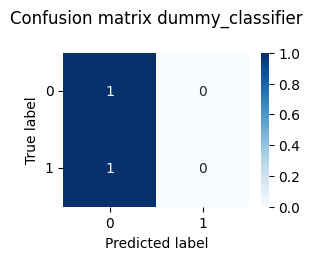

Tiempo de ejecución 0.48 segundos. [dummy_classifier]
                           Buscando parámetros: logistic_regression                           



1458 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mvarasg\anaconda3\envs\proyecto2-environment\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mvarasg\anaconda3\envs\proyecto2-environment\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\mvarasg\anaconda3\envs\proyecto2-environment\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

Best Parameters: {'SelectPercentile__percentile': 80, 'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__intercept_scaling': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best Score: 0.729585270512913
                  Resultados Clasificador: logistic_regression
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1695
           1       0.60      0.30      0.40       701

    accuracy                           0.74      2396
   macro avg       0.68      0.61      0.62      2396
weighted avg       0.71      0.74      0.71      2396



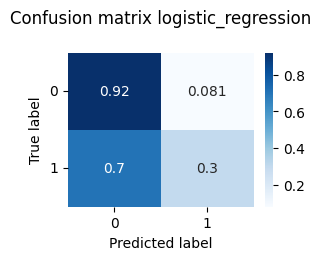

Tiempo de ejecución 10.7 segundos. [logistic_regression]
                           Buscando parámetros: k_neighbors_classifier                           
Best Parameters: {'SelectPercentile__percentile': 70, 'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
Best Score: 0.7284761631861265
                  Resultados Clasificador: k_neighbors_classifier
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1695
           1       0.54      0.36      0.43       701

    accuracy                           0.72      2396
   macro avg       0.65      0.62      0.62      2396
weighted avg       0.70      0.72      0.70      2396



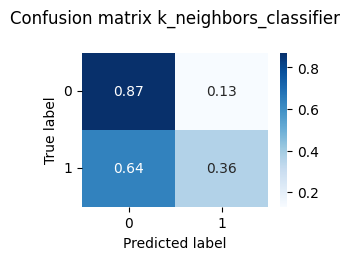

Tiempo de ejecución 1.48 segundos. [k_neighbors_classifier]
                           Buscando parámetros: decision_tree_classifier                           
Best Parameters: {'SelectPercentile__percentile': 70, 'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Best Score: 0.7814545373478939
                  Resultados Clasificador: decision_tree_classifier
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1695
           1       0.65      0.52      0.58       701

    accuracy                           0.78      2396
   macro avg       0.74      0.70      0.71      2396
weighted avg       0.77      0.78      0.77      2396



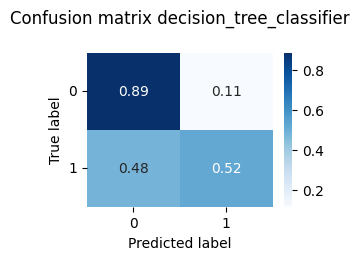

Tiempo de ejecución 1.11 segundos. [decision_tree_classifier]
                           Buscando parámetros: svc_classifier                           
Best Parameters: {'SelectPercentile__percentile': 70, 'classifier__C': 1.0, 'classifier__class_weight': None, 'classifier__kernel': 'rbf'}
Best Score: 0.7544285335684121
                  Resultados Clasificador: svc_classifier
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1695
           1       0.64      0.33      0.43       701

    accuracy                           0.75      2396
   macro avg       0.70      0.62      0.63      2396
weighted avg       0.73      0.75      0.72      2396



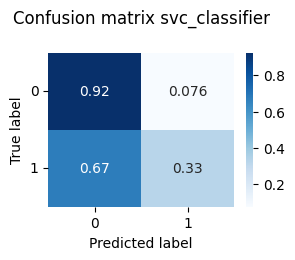

Tiempo de ejecución 3.43 segundos. [svc_classifier]
                           Buscando parámetros: random_forest_classifier                           
Best Parameters: {'SelectPercentile__percentile': 70, 'classifier__class_weight': None, 'classifier__max_depth': 8, 'classifier__n_estimators': 300}
Best Score: 0.7814545373478939
                  Resultados Clasificador: random_forest_classifier
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1695
           1       0.67      0.52      0.58       701

    accuracy                           0.78      2396
   macro avg       0.74      0.71      0.72      2396
weighted avg       0.77      0.78      0.77      2396



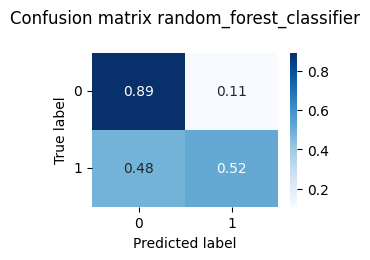

Tiempo de ejecución 10.94 segundos. [random_forest_classifier]
                           Buscando parámetros: lightgbm_classifier                           
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 1607, number of negative: 3983
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 5590, number of used features: 27
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:B

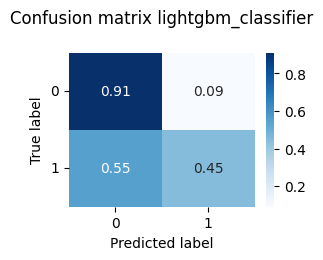

Tiempo de ejecución 7.99 segundos. [lightgbm_classifier]
                           Buscando parámetros: xgboost_classifier                           
Best Parameters: {'SelectPercentile__percentile': 70, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best Score: 0.7841389571620946
                  Resultados Clasificador: xgboost_classifier
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1695
           1       0.66      0.50      0.57       701

    accuracy                           0.78      2396
   macro avg       0.73      0.70      0.71      2396
weighted avg       0.77      0.78      0.77      2396



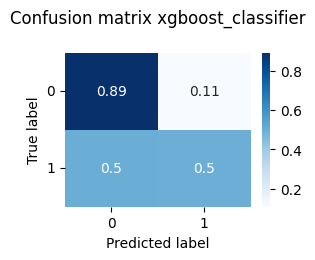

Tiempo de ejecución 8.64 segundos. [xgboost_classifier]
Tiempo Total de ejecución 44.77 segundos.


In [28]:
import time
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
def obtener_hiperparametros(clf_list, params_list, df):
    t_inicial = time.time()
    params_res = []
    X_train, X_test, y_train, y_test = train_test_split(df, df['credit_score'], test_size=0.3, random_state=0)
    parametros = [(x[0], x[1], y) for x, y in zip(clf_list, params_list)]
    for clf, name, grid in parametros:
        time_i = time.time()
        print('\033[94m\033[1m=====================\033[00m'*5)
        print(f'\033[94m\033[1m                           Buscando parámetros: {name}                           \033[00m')
        print('\033[94m\033[1m=====================\033[00m'*5)
        baseline = Pipeline([
        ('column_transformer', column_transformer),
        ('SelectPercentile', SelectPercentile(score_func=f_classif, percentile=90)),
        ('classifier', clf)])
        halving_cv = HalvingGridSearchCV(baseline, grid, cv=3, n_jobs=-1, random_state=0, scoring= 'f1_weighted')
        halving_cv.fit(X_train, y_train)
        best_params = halving_cv.best_params_
        best_score = halving_cv.best_score_
        best_model = halving_cv.best_estimator_
        print(f"Best Parameters: {best_params}")
        print(f"Best Score: {best_score}")
        predictions = best_model.predict(X_test)
        cm = confusion_matrix(y_test, predictions, normalize='true')
        classes = unique_labels(df['credit_score'])
        print("\033[1m=============\033[0m"*7)
        print('                  '+f'\033[1mResultados Clasificador: {name}\033[0m')
        print("\033[1m=============\033[0m"*7)
        print(classification_report(y_test, predictions))
        df_confusion = pd.DataFrame(cm, index=classes, columns=classes)
        plt.figure(figsize=(3, 2))
        g = sns.heatmap(df_confusion, annot=True, cmap="Blues")
        g.set_yticklabels(g.get_yticklabels(), rotation=0)
        plt.title(f'Confusion matrix {name}\n')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.autoscale()
        plt.show()
        tiempo_ejecución = time.time() - time_i
        print(f'Tiempo de ejecución {round(tiempo_ejecución,2)} segundos. [{name}]')
        params_res += [best_params]
    print(f'Tiempo Total de ejecución {round(time.time()-t_inicial,2)} segundos.')
    return params_res


res_parametros = obtener_hiperparametros(clf_list, params_list, df)


In [29]:
res_parametros

[{'SelectPercentile__percentile': 90, 'classifier__strategy': 'prior'},
 {'SelectPercentile__percentile': 80,
  'classifier__C': 0.1,
  'classifier__class_weight': None,
  'classifier__intercept_scaling': 1,
  'classifier__penalty': 'l2',
  'classifier__solver': 'saga'},
 {'SelectPercentile__percentile': 70,
  'classifier__n_neighbors': 7,
  'classifier__weights': 'uniform'},
 {'SelectPercentile__percentile': 70,
  'classifier__criterion': 'entropy',
  'classifier__max_depth': 5,
  'classifier__min_samples_split': 2},
 {'SelectPercentile__percentile': 70,
  'classifier__C': 1.0,
  'classifier__class_weight': None,
  'classifier__kernel': 'rbf'},
 {'SelectPercentile__percentile': 70,
  'classifier__class_weight': None,
  'classifier__max_depth': 8,
  'classifier__n_estimators': 300},
 {'SelectPercentile__percentile': 70,
  'classifier__boosting_type': 'goss',
  'classifier__learning_rate': 0.01,
  'classifier__num_leaves': 31},
 {'SelectPercentile__percentile': 70,
  'classifier__learni


#### Bonus

1. **Optuna** [0.5 extras]: Pueden probar también [`OptunaSearchCV`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html) de la librería [`Optuna`](https://optuna.org/), la cuál es bastante popular para buscar modelos de redes neuronales.
2. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
3. **Imabalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/). 
4. **Probar pycaret (AutoML) [0.3 extras]**.

Algunas notas interesantes sobre este proceso:

- No se les pide rendimientos cercanos al 100% de la métrica para concretar exitosamente el proyecto. Por otra parte, celebren cada progreso que obtengan.
- **Hacer grillas computables**: Si la grilla se va a demorar 1/3 la edad del universo en explorarse completamente, entonces achíquenla a algo que sepan que va a terminar.
- Aprovechen el procesamiento paralelo (con `njobs`) para acelerar la búsqueda. Sin embargo, si tienen problemas con la memoria RAM, reduzca la cantidad de jobs a algo que su computador/interprete web pueda procesar.
- La pipelines permiten cachear (guardar temporalmente) etapas cuyo cálculo es redudante, como por ejemplo el escalamiento y la imputación, acelerando así la computación. **Importante:** Para esto, cuando ejecuten `GridSearchCV`, agreguen a la pipeline en el parámetro `memory = "."`.

**Al final de este proceso, seleccione el mejor modelo encontrado, prediga el conjunto de prueba y reporte sus resultados.**

In [38]:
#usar imputador:
from sklearn.impute import SimpleImputer

df_imput = pd.read_parquet('dataset.pq')
X2_train, X2_test, y2_train, y2_test = train_test_split(df_imput, df_imput['credit_score'], test_size=0.3, random_state=0)

RF = RandomForestClassifier(class_weight = 'balanced', max_depth = 5, n_estimators = 200, random_state= 0)


RF_Classificator = Pipeline([
        ('column_transformer', column_transformer),
        ('Imput',SimpleImputer(strategy='mean') ),
        ('SelectPercentile', SelectPercentile(score_func=f_classif, percentile=80)),
        ('classifier', RF)])
pipeline_classifer(RF_Classificator, X2_train, X2_test, y2_train, y2_test, 'random_forest_classifier')

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'CUS_0x1ccd'

                  Resultados Clasificador: random_forest_classifier


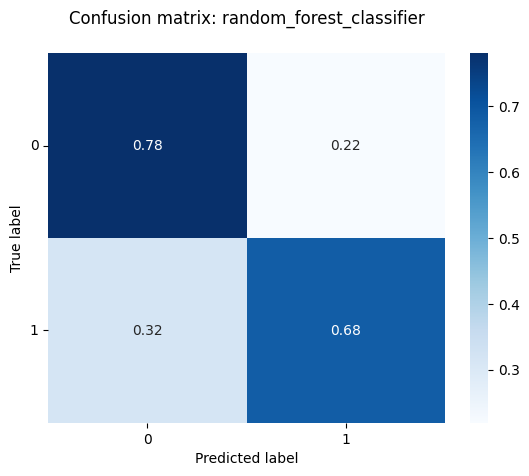

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1695
           1       0.56      0.68      0.62       701

    accuracy                           0.75      2396
   macro avg       0.71      0.73      0.72      2396
weighted avg       0.77      0.75      0.76      2396



In [13]:

RF = RandomForestClassifier(class_weight = 'balanced', max_depth = 5, n_estimators = 200, random_state= 0)
RF_Classificator = Pipeline([
        ('column_transformer', column_transformer),
        ('SelectPercentile', SelectPercentile(score_func=f_classif, percentile=80)),
        ('classifier', RF)])
pipeline_classifer(RF_Classificator, X_train, X_test, y_train, y_test, 'random_forest_classifier')

### 6. Interpretabilidad [1.0 puntos]

Para la interpretabilidad el modelo, se utilizaran métodos locales, en específico se hará con SHAP values y se evaluará el impacto que tienen los valores shap de cada característica en la clasificación de cada caso.\\

In [14]:
import shap

explainer = shap.TreeExplainer(RF_Classificator.named_steps['classifier'])

baseline2 = Pipeline([
    ('column_transformer', column_transformer),
    ('SelectPercentile', SelectPercentile(score_func=f_classif, percentile=80)),
    ])

shap_fit = baseline2.fit_transform(X_train,y_train)
shap_df = pd.DataFrame(shap_fit, columns = baseline2.get_feature_names_out())
shap_values = explainer(shap_df)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


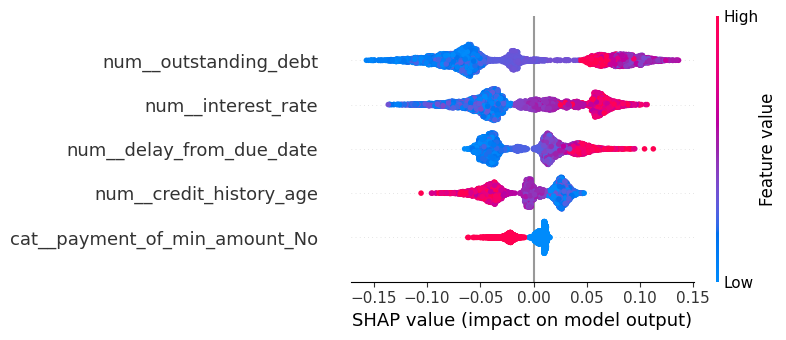

In [36]:
shap.summary_plot(shap_values[:, :, 1], shap_df, max_display = 5)

De los resultados obtenidos de los valores SHAP, es posible identificar los cuáles tienen mayor relevancia en las clasificaciones del modelo, siendo estos principalmente características numéricas, en orden estas son outstanding_debt, interest_rate, delay_from_due_date y credit_history_age. Las primeras 3 representan valores altos positivos para los casos de clientes fraudulentos, lo que implica que un alto valor de estas características implica mayor posibilidades de ser fraudulento, no así para el caos de credit_history_age, el cual está a la inversa, esto quiere decir que una persona un un historial de crédito de pocos años es más propensa a ser fraudulenta, no así el caso de tener más años de historial de crédito. Así mismo, existe sólo una variable categórica en el top 5 en los valores SHAP, y esta es payment_of_min_amount = no , esta hace referencia a que si el cliente del banco hace el pago de sus cuotas por el mínimo o lo hace por un valor mayor, siendo el caso de que se hagan con un valor mayor los representados por la categoría de 'no', es notable que el efecto de ser de esta categoría principalmente aporta a que los clientes sean de la categoría '0' o no fraudulentos.



En síntesis, todas las características más importante reconocidas con SHAP values tienden a ser relacionas al historial bancario de los clientes más que de características individuales como la edad, el sueldo o el trabajo, lo cual tiene sentido puesto que un historial de pagos de créditos que posea deudas o pagos atrasado están directamente relacionados con lo que buscamos clasificar, que es obtener una referencia de que si un cliente pagará o no un crédito otorgado por el banco.


Shap values for 1st instance


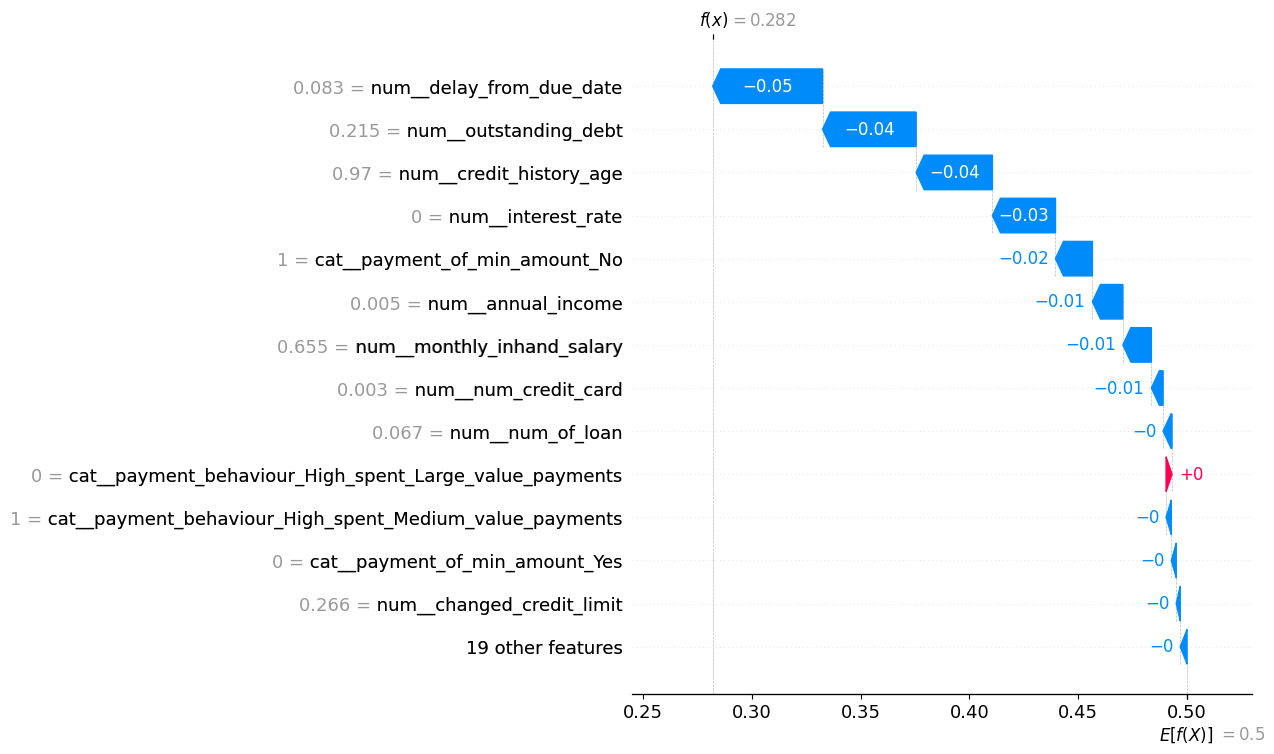

In [32]:
idx= 10

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 16

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 30

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 458

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 348

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 49

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 189

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 142

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 509

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)

idx= 742

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx, :, 1], max_display = 14)


Visto de manera más específica a través de algunos ejemplos, se ve que para este clasificador, gran cantidad de las características no suelen aportar nada en la clasificación, esto es esperable para características categorías, puesto que para una categórica, solo existe una categoría que tendrá un valor distinto de cero por la naturaleza de la clasificación a través de OneHotEnocder, sin embargo, esto pasa también con características numéricas, las cuales no suelen aportar al modelo, lo que lleva a esperar que el modelo está utilizando features que realmente no son necesarias y entrega indicios de que la clasificación podría ser optimizada al no considerar algunas de estas y considerar nuevas características no proporcionadas en los datos actuales que sí podrían ser relevantes. Respecto a los valore s que si poseen un impacto en el modelo, vemos que la gran mayoría de estos están relacionados a las features más importantes que se vieron en el resumen de SHAP values anterior, esto posee coherencia y continuidad no lo esperado de qué características relacionadas al historial bancario son las más relevantes para la clasificación.

### 7. Concluir [1.0 puntos]

_Aquí deben escribir una breve conclusión del trabajo que hicieron en donde incluyan (pero no se limiten) a responder las siguientes preguntas:_

- ¿Pudieron resolver exitosamente el problema?
- ¿Son aceptables los resultados obtenidos?
- ¿En que medida el EDA ayudó a comprender los datos en miras de generar un modelo predictivo?

Respecto a la clasificación:

- ¿Como fue el rendimiento del baseline para la clasificación?
- ¿Pudieron optimizar el baseline para la clasificación?
- ¿Que tanto mejoro el baseline de la clasificación con respecto a sus optimizaciones?

Finalmente:

- ¿Estuvieron conformes con sus resultados?
- ¿Creen que hayan mejores formas de modelar el problema?
- ¿En general, qué aprendieron del proyecto? ¿Qué no aprendieron y les gustaría haber aprendido?

**OJO** si usted decide responder parte de estas preguntas, debe redactarlas en un formato de informe y no responderlas directamente.

### Otras Instrucciones

Recordar el uso de buenas prácticas de MLOPS como replicabilidad (fijar semillas aleatorias) o el uso del registro de experimentos (con MLFlow). Si bien son opcionales, es altamente recomendado su uso.


### 8. Bonus: Implementación de Kedro y FastAPI [1.5 puntos]

**OPCIONAL**

En esta sección se les solicita utilizar las últimas tecnologías vistas en el curso para la productivización del proyecto de ciencia de datos, centrándose en la organización y gestión de los flujos de trabajo a través de componentes y pipelines, más el servicio del modelo a través del desarrollo de una API.

Para esto: 

1. Genere un proyecto de `Kedro` en donde separe por responsabilidades los nodos/componentes de su proyecto de ciencia de datos en módulos separados. [1.0 puntos]
2. Genere un servidor basado en `FastAPI` el cuál a través de un método post, reciba un batch de datos y genere predicciones para cada uno de ellos. [0.5 puntos]

Las implementaciones son libres. Es decir, usted decide qué componentes implementar, como usar el catálogo de datos y la parametrización del flujo. Sin embargo, evaluaremos buen uso de los framework, modularización y separación de responsabilidades.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>